In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates

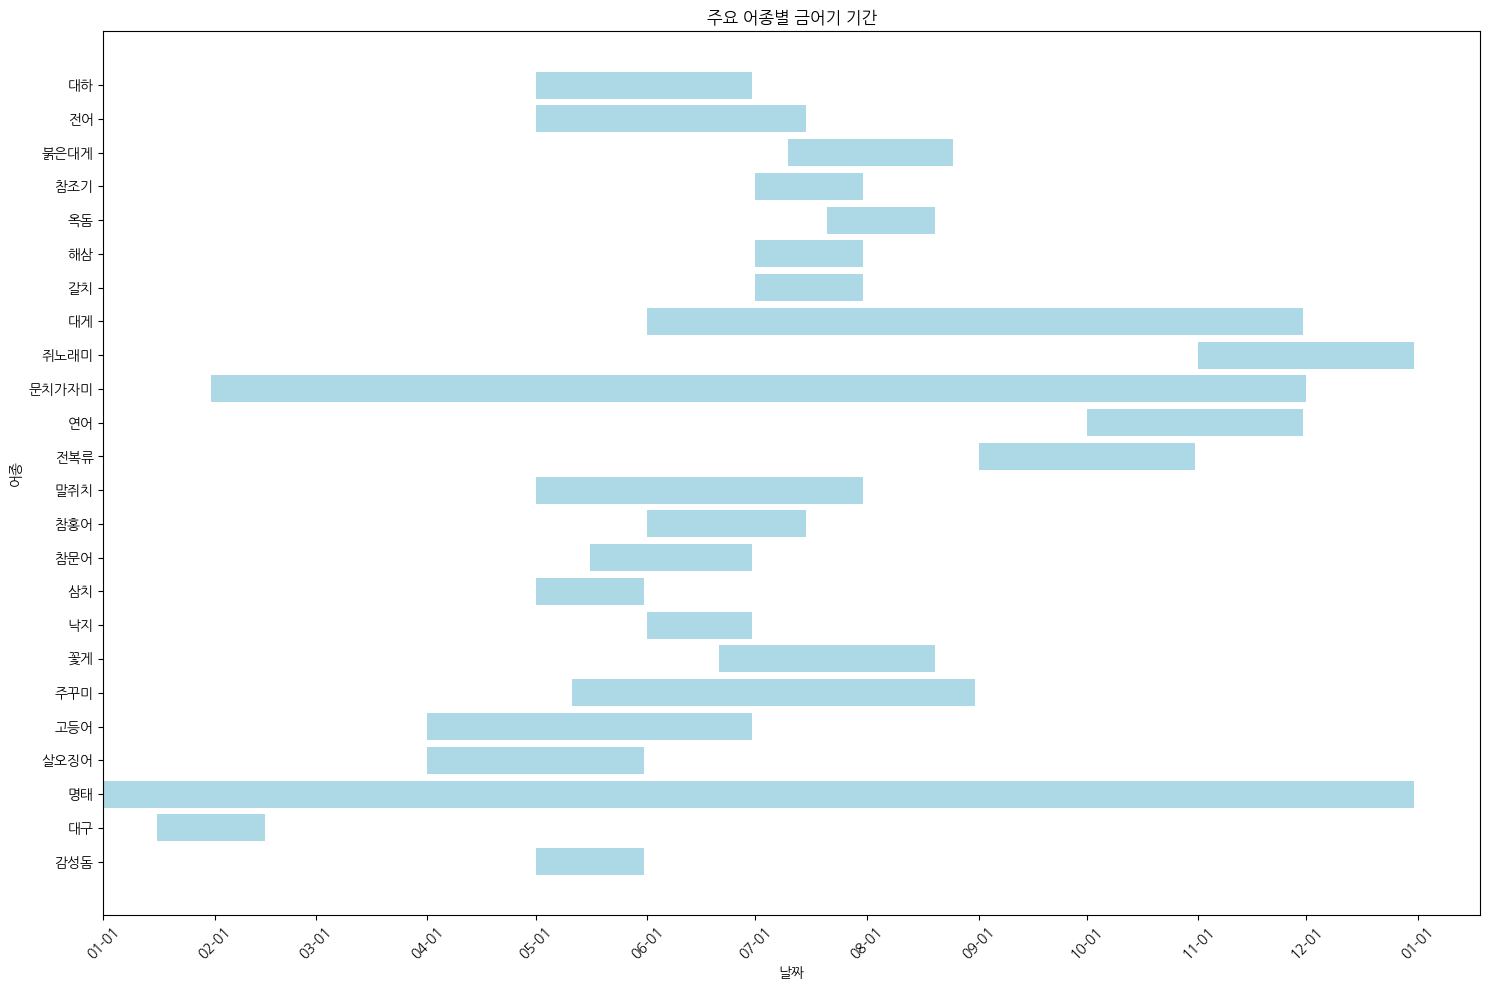

In [2]:
file_path = "../data/raw/금어기_데이터.csv"
df = pd.read_csv(file_path, encoding='utf-8-sig')

# 날짜 형식 변환
df['포획금지 시작일'] = pd.to_datetime(df['포획금지 시작일'], format='%m월 %d일')
df['포획금지 종료일'] = pd.to_datetime(df['포획금지 종료일'], format='%m월 %d일')

# 금어기 기간 계산
df['금어기 기간'] = df['포획금지 종료일'] - df['포획금지 시작일']

# 시각화
fig, ax = plt.subplots(figsize=(15, 10))

# Gantt 차트 생성
for i, row in df.iterrows():
    ax.barh(row['어종'], row['금어기 기간'].days, left=row['포획금지 시작일'], color='lightblue')

# 날짜 포맷 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# 그래프 제목 및 레이블 설정
plt.title('주요 어종별 금어기 기간')
plt.xlabel('날짜')
plt.ylabel('어종')
plt.tight_layout()
plt.show()